In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Experiment import Experiment
from algorithms import Greedy, SoftmaxPolicy, UCB, ThompsonSampling, Reinforce, UCB1_Normal
from utils import create_inverse_schedule
from metrics import MeanCummulativeRegret, PercentOptimalArmPull, AverageRegretOverTime
from reward_distributions import Normal
import Distribution

In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-d

# Bernoulli Reward Distribution
## Number of Arms K=2

#### Greedy Algorithm

In [9]:
algo = {"Greedy": (Greedy, {}),
       "$\epsilon=0.1$-Greedy": (Greedy, {"eps": 0.1}),
       "$\epsilon=0.01$-Greedy": (Greedy, {"eps": 0.01}),
       "Variable $\epsilon$-Greedy": (Greedy, {"eps_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Bernoulli_2_Greedy", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [10]:
experiment.simulate()

100%|██████████| 1000/1000 [08:43<00:00,  1.91it/s]


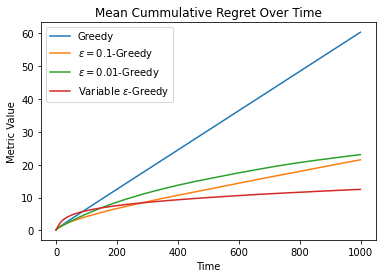

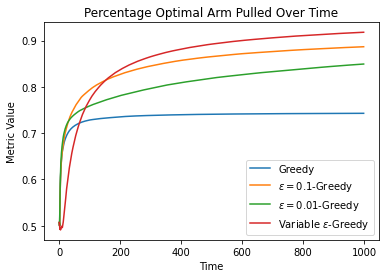

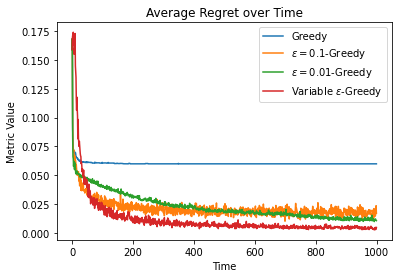

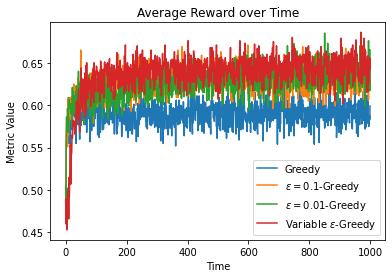

In [11]:
experiment.generate_plots()

#### Softmax Policy

In [5]:
algo = {r"Softmax with $\tau=0.01$": (SoftmaxPolicy, {"temp": 0.01}),
        r"Softmax with $\tau=10000$": (SoftmaxPolicy, {"temp": 10000}),
       r"Variable $\tau$-Softmax": (SoftmaxPolicy, {"temp_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Bernoulli_2_Softmax", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()])

In [6]:
experiment.simulate()

100%|██████████| 1000/1000 [08:19<00:00,  2.00it/s]


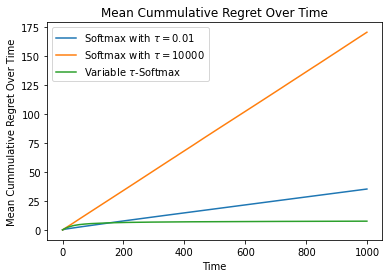

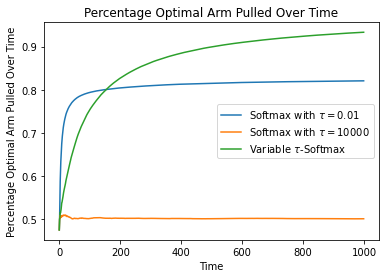

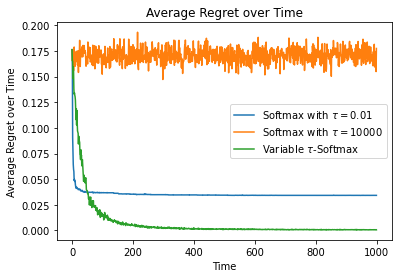

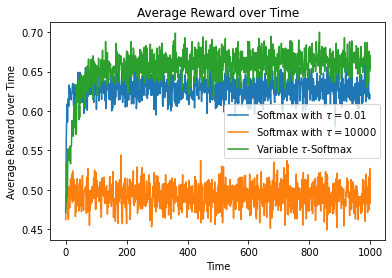

In [7]:
experiment.generate_plots()

In [8]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Softmax with $\tau=0.01$ 35.41298906239709
Softmax with $\tau=10000$ 170.54714716068654
Variable $\tau$-Softmax 7.719011895882566


#### UCB Algorithm

In [9]:
algo = {"UCB with $C=1$": (UCB, {"C": 1}),
        "UCB with $C=100$": (UCB, {"C": 100}),
       "Variable $C$-UCB": (UCB, {"C_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Bernoulli_2_UCB", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [10]:
experiment.simulate()

100%|██████████| 1000/1000 [05:57<00:00,  2.80it/s]


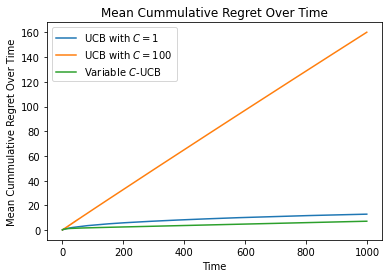

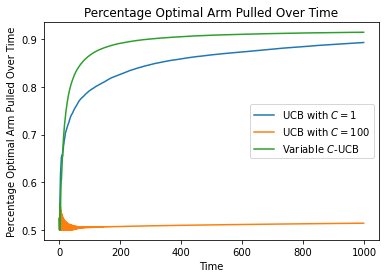

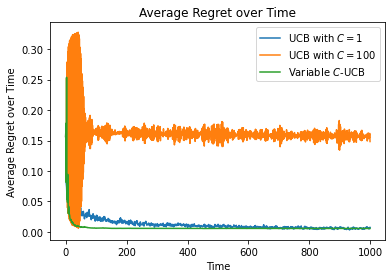

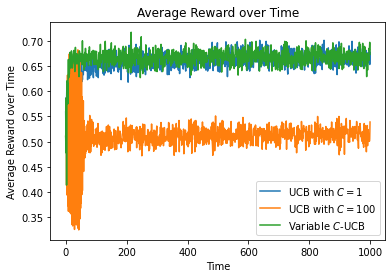

In [11]:
experiment.generate_plots()

In [12]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

UCB with $C=1$ 12.906514921000102
UCB with $C=100$ 160.1716278698234
Variable $C$-UCB 7.196657102353073


#### Thompson Sampling

In [13]:
algo = {"Thompson Sampling": (ThompsonSampling, {})}

experiment = Experiment(
    algo, 
    "Bernoulli_2_Thompson_Sampling", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [14]:
experiment.simulate()

100%|██████████| 1000/1000 [00:49<00:00, 20.28it/s]


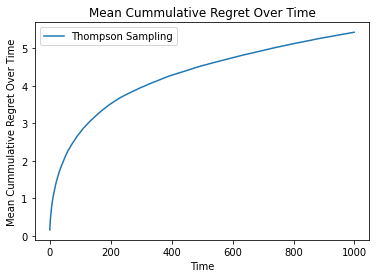

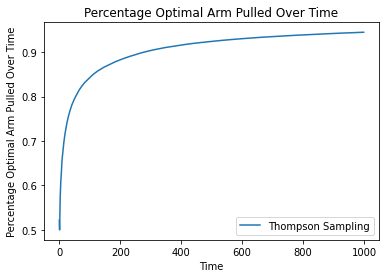

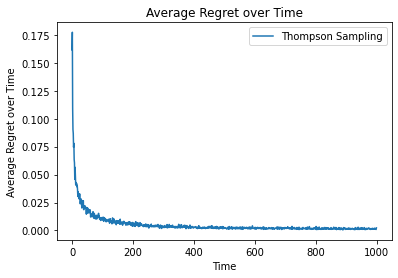

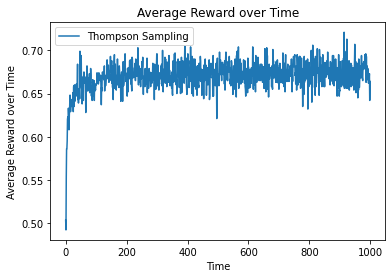

In [15]:
experiment.generate_plots()

In [16]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Thompson Sampling 5.43295921112031


#### Reinforce Algorithm

In [17]:
algo = {"Reinforce": (Reinforce, {"lr": 0.1}),
        "Reinforce with Baseline": (Reinforce, {"use_baseline": True, "lr": 0.1})}

experiment = Experiment(
    algo, 
    "Bernoulli_2_Reinforce", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [18]:
experiment.simulate()

100%|██████████| 1000/1000 [07:35<00:00,  2.20it/s]


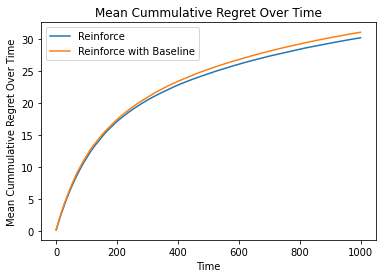

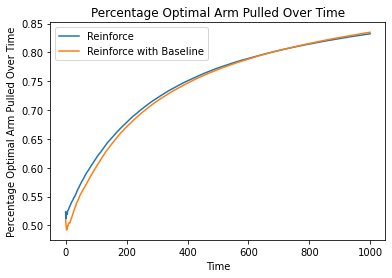

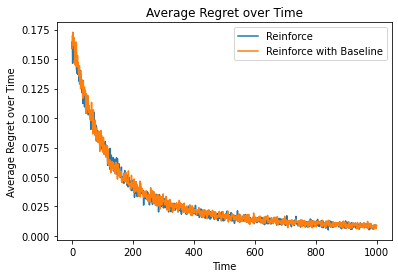

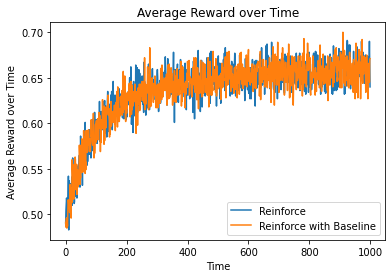

In [19]:
experiment.generate_plots()

In [20]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Reinforce 30.191133922185664
Reinforce with Baseline 31.056239448639968


#### Comparison of all algorithms

In [21]:
algo = {
    "Variable $\epsilon$-Greedy": (Greedy, {"eps_schedule": create_inverse_schedule(10)}),
    r"Variable $\tau$-Softmax": (SoftmaxPolicy, {"temp_schedule": create_inverse_schedule(10)}),
    "Variable $C$-UCB": (UCB, {"C_schedule": create_inverse_schedule(10)}),
    "Thompson Sampling": (ThompsonSampling, {}),
    "Reinforce": (Reinforce, {"lr": 0.1})
}

experiment = Experiment(
    algo, 
    "Bernoulli_2_All", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [22]:
experiment.simulate()

100%|██████████| 1000/1000 [10:44<00:00,  1.55it/s]


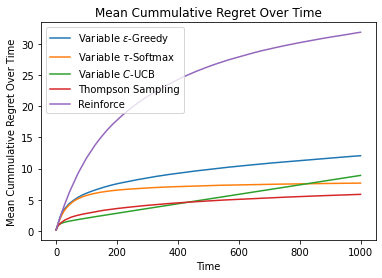

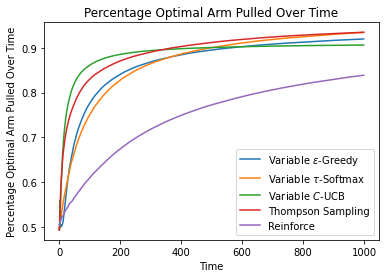

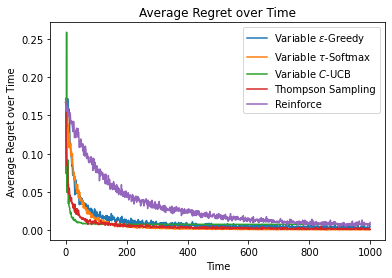

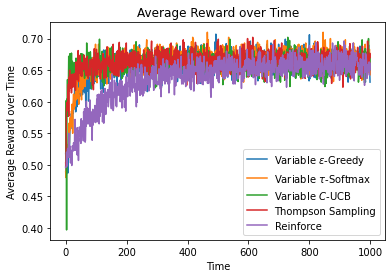

In [23]:
experiment.generate_plots()

In [24]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Variable $\epsilon$-Greedy 12.071821759012211
Variable $\tau$-Softmax 7.677002699622296
Variable $C$-UCB 8.910288710274347
Thompson Sampling 5.872393446230802
Reinforce 31.88120347725706


## Number of arms K=5

#### Greedy Algorithm

In [4]:
algo = {"Greedy": (Greedy, {}),
       "$\epsilon=0.1$-Greedy": (Greedy, {"eps": 0.1}),
       "$\epsilon=0.01$-Greedy": (Greedy, {"eps": 0.01}),
       "Variable $\epsilon$-Greedy": (Greedy, {"eps_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Bernoulli_5_Greedy", 
    num_runs=1000, 
    num_arms=5, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [5]:
experiment.simulate()

100%|██████████| 1000/1000 [09:19<00:00,  1.79it/s]


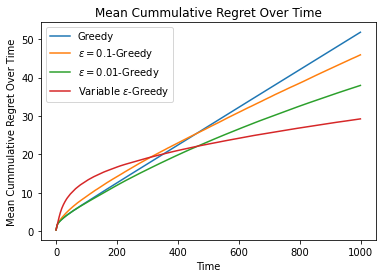

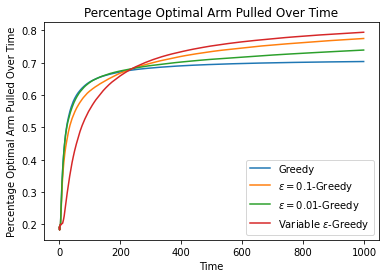

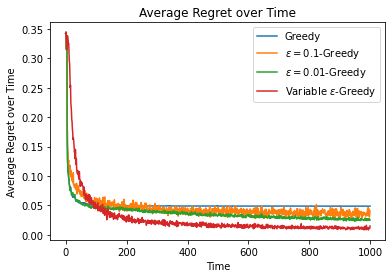

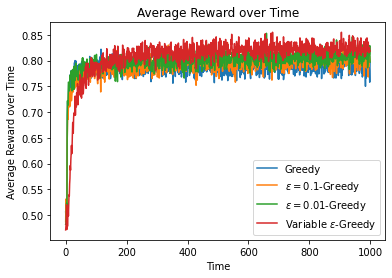

In [6]:
experiment.generate_plots()

In [7]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Greedy 51.810907880169246
$\epsilon=0.1$-Greedy 45.927425592723445
$\epsilon=0.01$-Greedy 37.96491153891335
Variable $\epsilon$-Greedy 29.25276908842655


#### Softmax Policy

In [8]:
algo = {r"Softmax with $\tau=0.01$": (SoftmaxPolicy, {"temp": 0.01}),
        r"Softmax with $\tau=10000$": (SoftmaxPolicy, {"temp": 10000}),
       r"Variable $\tau$-Softmax": (SoftmaxPolicy, {"temp_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Bernoulli_5_Softmax", 
    num_runs=1000, 
    num_arms=5, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()])

In [9]:
experiment.simulate()

100%|██████████| 1000/1000 [08:31<00:00,  1.95it/s]


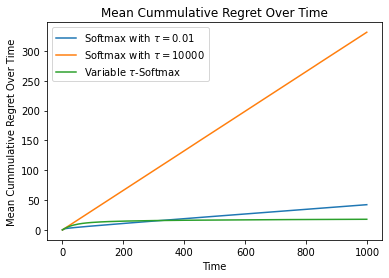

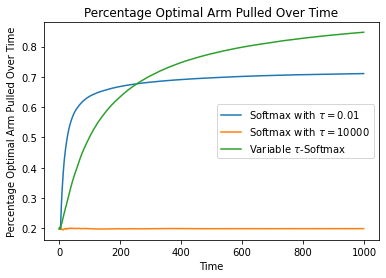

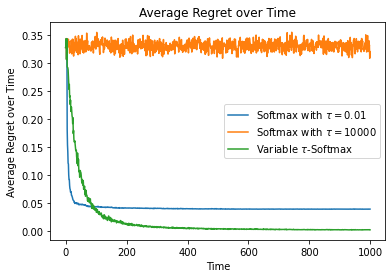

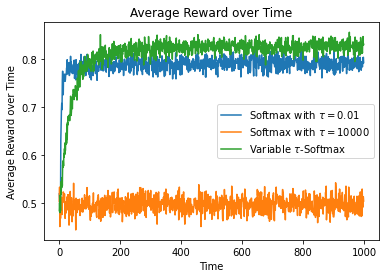

In [10]:
experiment.generate_plots()

In [11]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Softmax with $\tau=0.01$ 42.5514094012938
Softmax with $\tau=10000$ 331.1369127744941
Variable $\tau$-Softmax 18.141239092133848


#### UCB Algorithm

In [12]:
algo = {"UCB with $C=1$": (UCB, {"C": 1}),
        "UCB with $C=100$": (UCB, {"C": 100}),
       "Variable $C$-UCB": (UCB, {"C_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Bernoulli_5_UCB", 
    num_runs=1000, 
    num_arms=5, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [13]:
experiment.simulate()

100%|██████████| 1000/1000 [05:39<00:00,  2.94it/s]


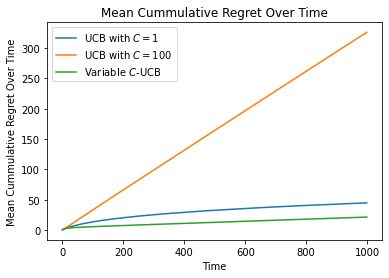

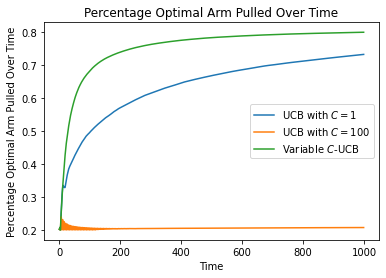

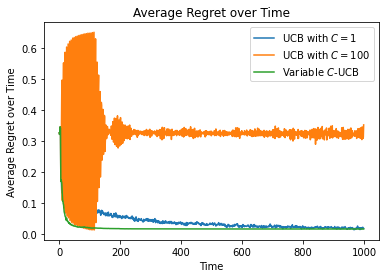

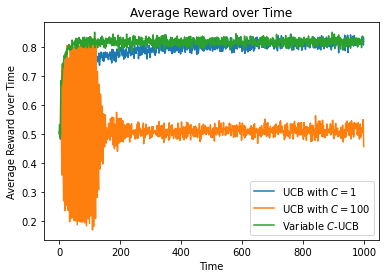

In [14]:
experiment.generate_plots()

In [15]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

UCB with $C=1$ 44.85640808780357
UCB with $C=100$ 326.1857867730964
Variable $C$-UCB 21.484828219912433


#### Thompson Sampling

In [16]:
algo = {"Thompson Sampling": (ThompsonSampling, {})}

experiment = Experiment(
    algo, 
    "Bernoulli_5_Thompson_Sampling", 
    num_runs=1000, 
    num_arms=5, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [17]:
experiment.simulate()

100%|██████████| 1000/1000 [01:17<00:00, 12.87it/s]


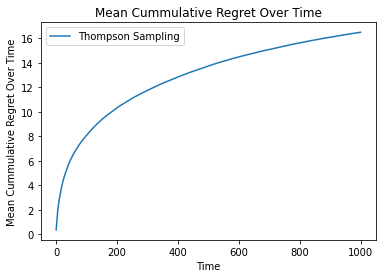

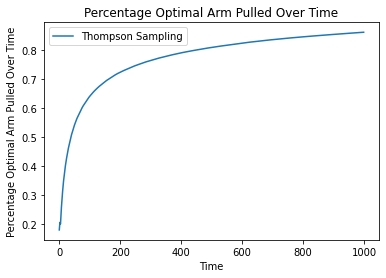

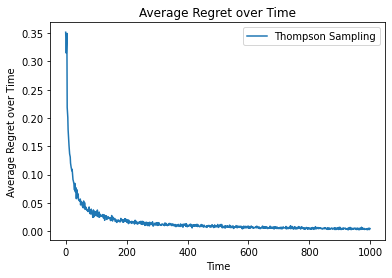

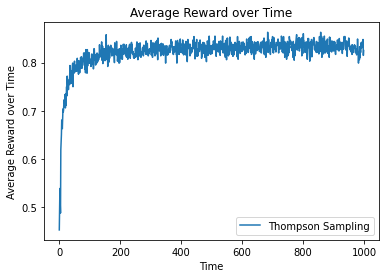

In [18]:
experiment.generate_plots()

In [19]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Thompson Sampling 16.49310182079325


#### Reinforce Algorithm

In [20]:
algo = {"Reinforce": (Reinforce, {"lr": 0.1}),
        "Reinforce with Baseline": (Reinforce, {"use_baseline": True, "lr": 0.1})}

experiment = Experiment(
    algo, 
    "Bernoulli_5_Reinforce", 
    num_runs=1000, 
    num_arms=5, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [21]:
experiment.simulate()

100%|██████████| 1000/1000 [07:51<00:00,  2.12it/s]


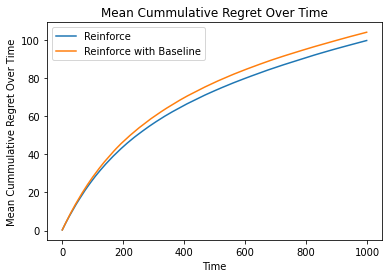

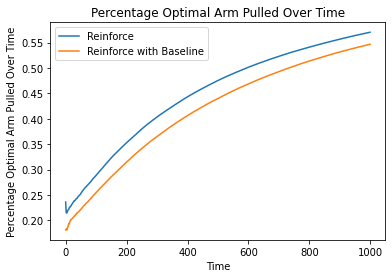

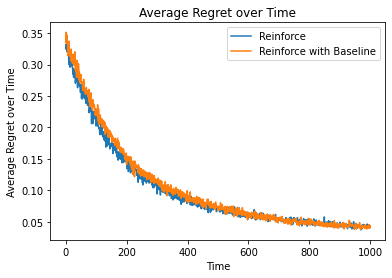

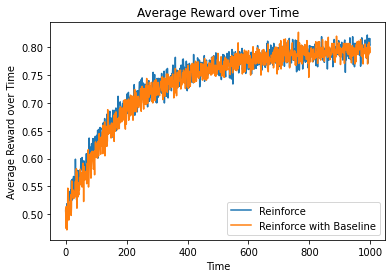

In [22]:
experiment.generate_plots()

In [23]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Reinforce 99.78965263007994
Reinforce with Baseline 104.13856161347718


#### Comparison of all Algorithms

In [24]:
algo = {
    "Variable $\epsilon$-Greedy": (Greedy, {"eps_schedule": create_inverse_schedule(10)}),
    r"Variable $\tau$-Softmax": (SoftmaxPolicy, {"temp_schedule": create_inverse_schedule(10)}),
    "Variable $C$-UCB": (UCB, {"C_schedule": create_inverse_schedule(10)}),
    "Thompson Sampling": (ThompsonSampling, {}),
    "Reinforce": (Reinforce, {"lr": 0.1})
}

experiment = Experiment(
    algo, 
    "Bernoulli_5_All", 
    num_runs=1000, 
    num_arms=5, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [25]:
experiment.simulate()

100%|██████████| 1000/1000 [06:59<00:00,  2.39it/s]


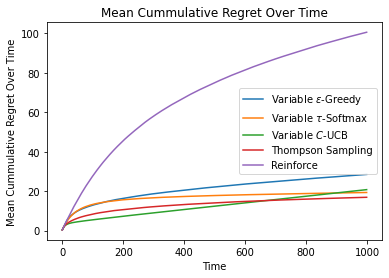

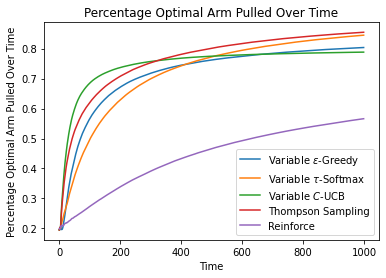

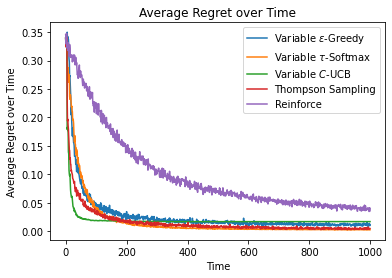

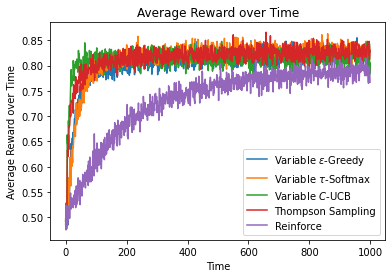

In [26]:
experiment.generate_plots()

In [27]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Variable $\epsilon$-Greedy 28.485613613123142
Variable $\tau$-Softmax 19.326587099019886
Variable $C$-UCB 20.771615089981932
Thompson Sampling 16.893683196610723
Reinforce 100.60817299897708


## Number of arms K=10

#### Greedy Algorithm

In [45]:
algo = {"Greedy": (Greedy, {}),
       "$\epsilon=0.1$-Greedy": (Greedy, {"eps": 0.1}),
       "$\epsilon=0.01$-Greedy": (Greedy, {"eps": 0.01}),
       "Variable $\epsilon$-Greedy": (Greedy, {"eps_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Bernoulli_10_Greedy", 
    num_runs=1000, 
    num_arms=10, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [46]:
experiment.simulate()

100%|██████████| 1000/1000 [02:33<00:00,  6.50it/s]


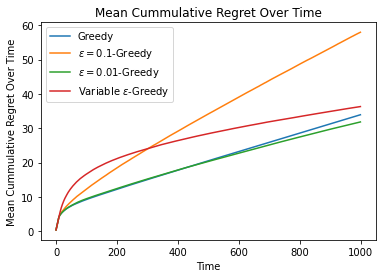

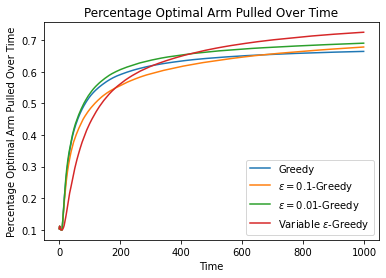

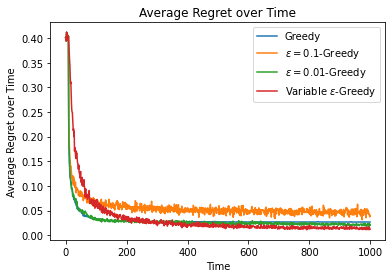

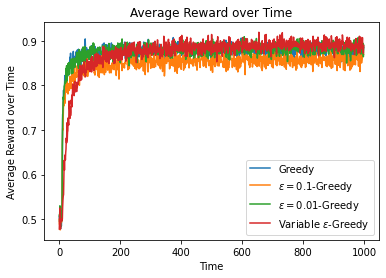

In [47]:
experiment.generate_plots()

In [48]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Greedy 33.92887270337956
$\epsilon=0.1$-Greedy 57.951263918394915
$\epsilon=0.01$-Greedy 31.834780652820342
Variable $\epsilon$-Greedy 36.31311894373679


#### Softmax Policy

In [28]:
algo = {r"Softmax with $\tau=0.01$": (SoftmaxPolicy, {"temp": 0.01}),
        r"Softmax with $\tau=10000$": (SoftmaxPolicy, {"temp": 10000}),
       r"Variable $\tau$-Softmax": (SoftmaxPolicy, {"temp_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Bernoulli_10_Softmax", 
    num_runs=1000, 
    num_arms=10, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()])

In [29]:
experiment.simulate()

100%|██████████| 1000/1000 [02:23<00:00,  6.95it/s]


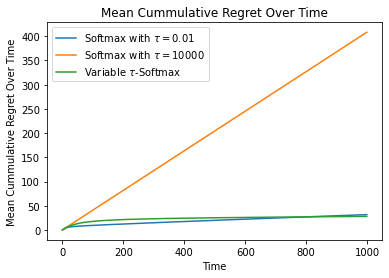

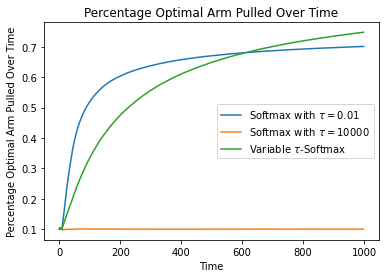

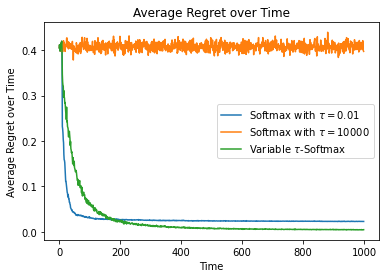

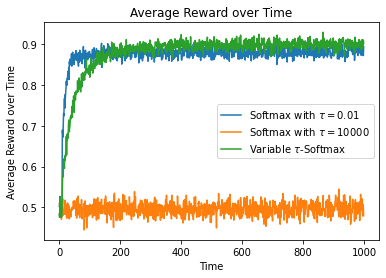

In [30]:
experiment.generate_plots()

In [31]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Softmax with $\tau=0.01$ 31.946701936786265
Softmax with $\tau=10000$ 408.1856632762875
Variable $\tau$-Softmax 28.354780841114597


#### UCB Algorithm

In [32]:
algo = {"UCB with $C=1$": (UCB, {"C": 1}),
        "UCB with $C=100$": (UCB, {"C": 100}),
       "Variable $C$-UCB": (UCB, {"C_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Bernoulli_10_UCB", 
    num_runs=1000, 
    num_arms=10, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [33]:
experiment.simulate()

100%|██████████| 1000/1000 [01:26<00:00, 11.58it/s]


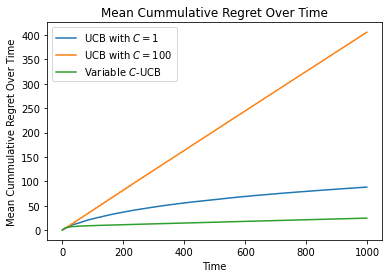

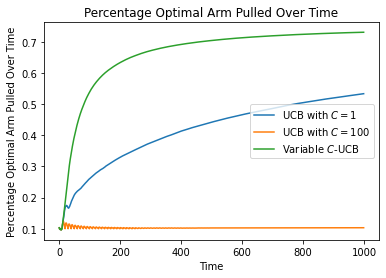

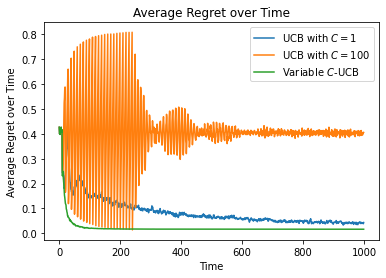

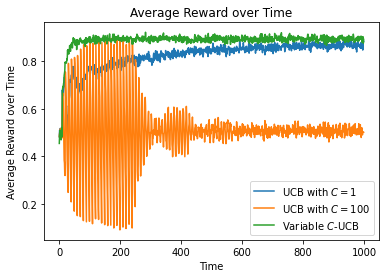

In [34]:
experiment.generate_plots()

In [35]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

UCB with $C=1$ 88.17546719669086
UCB with $C=100$ 405.57555457997137
Variable $C$-UCB 24.55836942804214


#### Thompson Sampling

In [36]:
algo = {"Thompson Sampling": (ThompsonSampling, {})}

experiment = Experiment(
    algo, 
    "Bernoulli_10_Thompson_Sampling", 
    num_runs=1000, 
    num_arms=10, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [37]:
experiment.simulate()

100%|██████████| 1000/1000 [00:20<00:00, 49.03it/s]


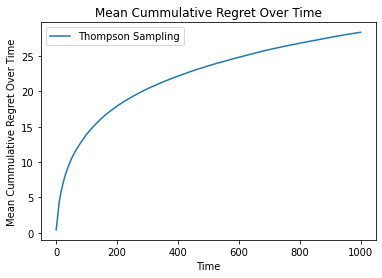

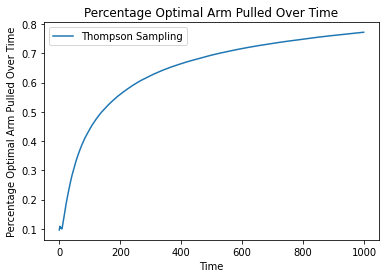

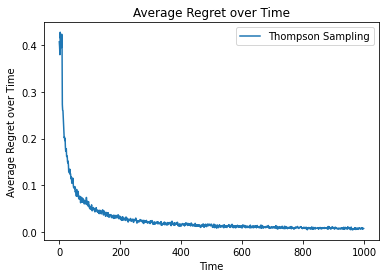

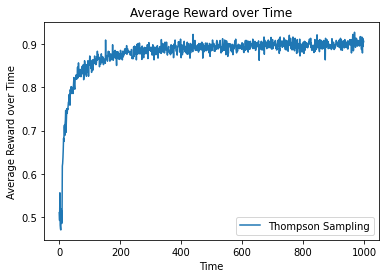

In [38]:
experiment.generate_plots()

In [39]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Thompson Sampling 28.34837249500921


#### Reinforce Algorithm

In [40]:
algo = {"Reinforce": (Reinforce, {"lr": 0.1}),
        "Reinforce with Baseline": (Reinforce, {"use_baseline": True, "lr": 0.1})}

experiment = Experiment(
    algo, 
    "Bernoulli_10_Reinforce", 
    num_runs=1000, 
    num_arms=10, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [41]:
experiment.simulate()

100%|██████████| 1000/1000 [02:10<00:00,  7.69it/s]


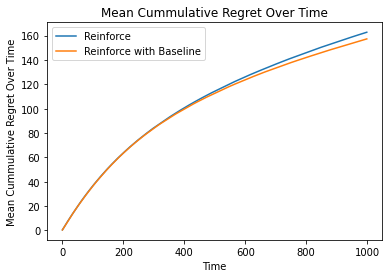

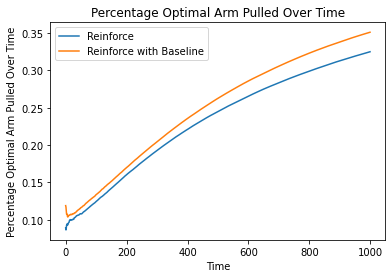

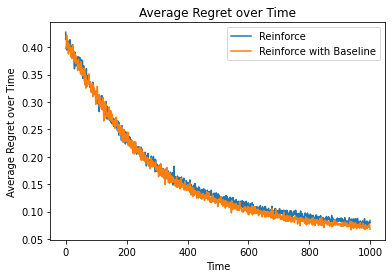

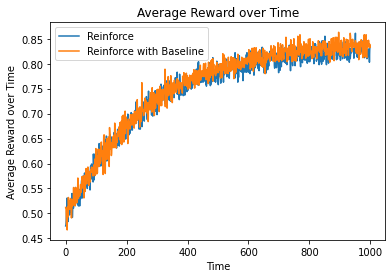

In [42]:
experiment.generate_plots()

In [43]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Reinforce 162.78293486534912
Reinforce with Baseline 157.31200050569785


In [53]:
algo = {
    "Variable $\epsilon$-Greedy": (Greedy, {"eps_schedule": create_inverse_schedule(10)}),
    r"Variable $\tau$-Softmax": (SoftmaxPolicy, {"temp_schedule": create_inverse_schedule(10)}),
    "Variable $C$-UCB": (UCB, {"C_schedule": create_inverse_schedule(10)}),
    "Thompson Sampling": (ThompsonSampling, {}),
    "Reinforce": (Reinforce, {"lr": 0.1})
}

experiment = Experiment(
    algo, 
    "Bernoulli_10_All", 
    num_runs=1000, 
    num_arms=10, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [54]:
experiment.simulate()

100%|██████████| 1000/1000 [03:15<00:00,  5.12it/s]


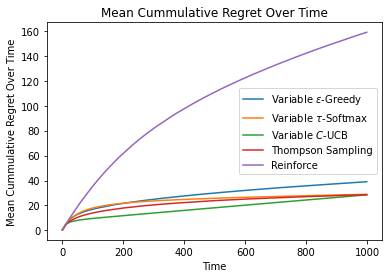

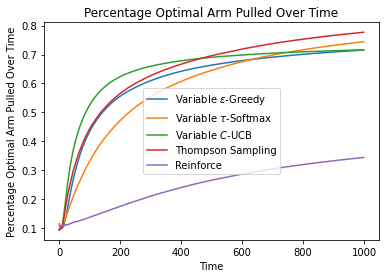

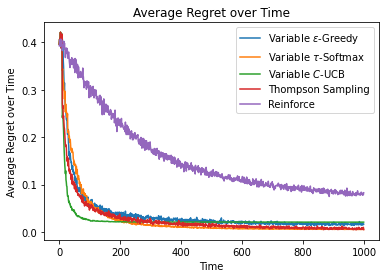

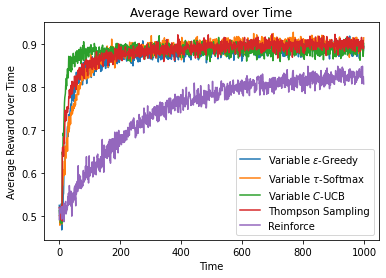

In [55]:
experiment.generate_plots()

In [56]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Variable $\epsilon$-Greedy 39.03763437380934
Variable $\tau$-Softmax 28.966494878677807
Variable $C$-UCB 28.52144507788797
Thompson Sampling 28.581592248372417
Reinforce 158.86779322839834


# Normal Reward Distribution (with variance $\sigma^{2}=0.01$)

## Number of Arms K=2

#### Greedy Algorithm

In [2]:
algo = {"Greedy": (Greedy, {}),
       "$\epsilon=0.1$-Greedy": (Greedy, {"eps": 0.1}),
       "$\epsilon=0.01$-Greedy": (Greedy, {"eps": 0.01}),
       "Variable $\epsilon$-Greedy": (Greedy, {"eps_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Normal_2_0.01_Greedy", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()], 
    reward_dist=Normal
)

In [3]:
experiment.simulate()

100%|██████████| 1000/1000 [08:59<00:00,  1.85it/s]


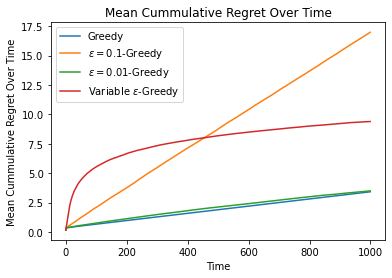

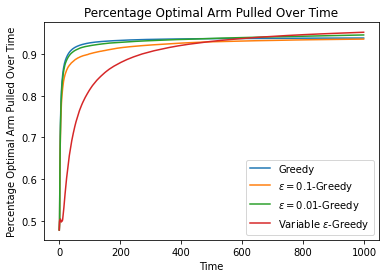

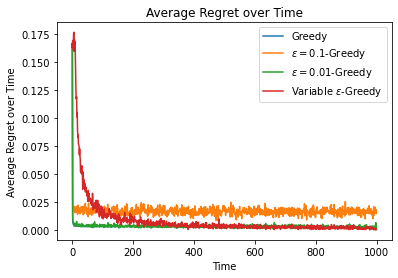

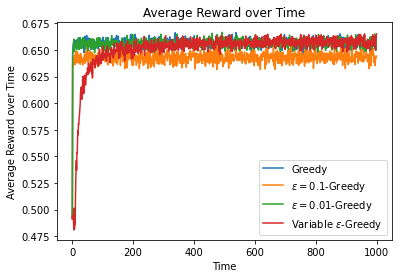

In [4]:
experiment.generate_plots()

In [5]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Greedy 3.4115648843204545
$\epsilon=0.1$-Greedy 16.99287191118815
$\epsilon=0.01$-Greedy 3.492826199851681
Variable $\epsilon$-Greedy 9.394700772047587


#### Softmax Policy

In [8]:
algo = {r"Softmax with $\tau=0.01$": (SoftmaxPolicy, {"temp": 0.01}),
        r"Softmax with $\tau=10000$": (SoftmaxPolicy, {"temp": 10000}),
       r"Variable $\tau$-Softmax": (SoftmaxPolicy, {"temp_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Normal_2_0.01_Softmax", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()],
    reward_dist=Normal
)

In [9]:
experiment.simulate()

100%|██████████| 1000/1000 [08:58<00:00,  1.86it/s]


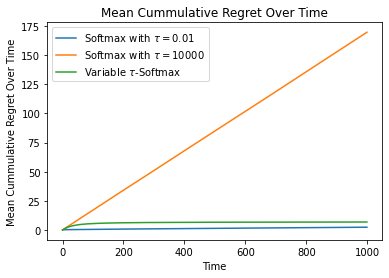

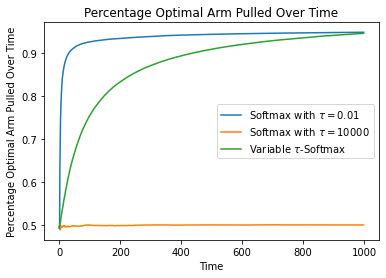

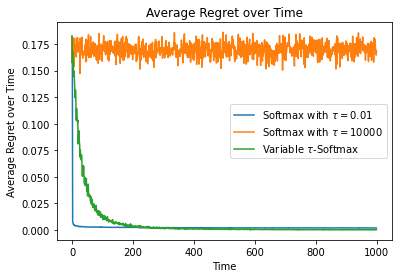

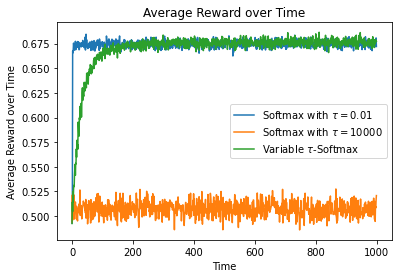

In [10]:
experiment.generate_plots()

In [11]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Softmax with $\tau=0.01$ 2.5049105547724144
Softmax with $\tau=10000$ 169.47869646260884
Variable $\tau$-Softmax 6.948842434792806


#### UCB1-Normal Algorithm

In [12]:
algo = {"UCB with $C=1$": (UCB1_Normal, {"C": 1}),
        "UCB with $C=100$": (UCB1_Normal, {"C": 100}),
       "Variable $C$-UCB": (UCB1_Normal, {"C_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Normal_2_0.01_UCB", 
    num_runs=1000,
    num_arms=2,
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()], 
    reward_dist=Normal
)

In [13]:
experiment.simulate()

100%|██████████| 1000/1000 [06:56<00:00,  2.40it/s]


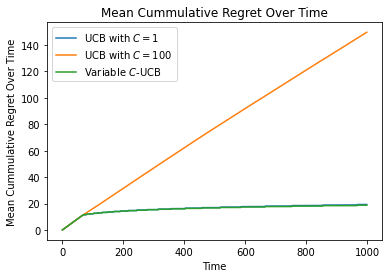

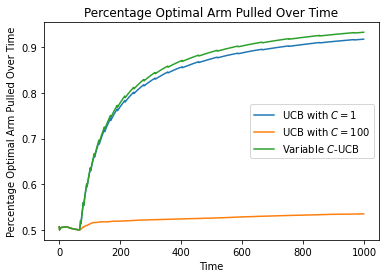

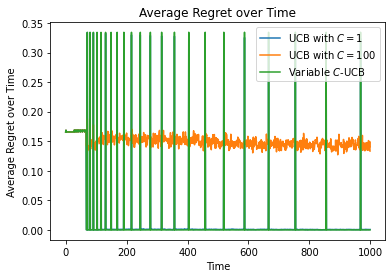

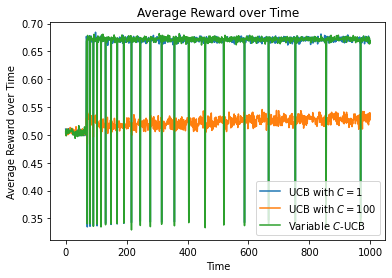

In [14]:
experiment.generate_plots()

In [15]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

UCB with $C=1$ 19.377311652262236
UCB with $C=100$ 149.47187390127434
Variable $C$-UCB 18.841118357828403


#### Thompson Sampling

In [16]:
algo = {"Thompson Sampling": (ThompsonSampling, {"prior_dist": Distribution.Normal})}

experiment = Experiment(
    algo, 
    "Normal_2_0.01_Thompson_Sampling", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()], 
    reward_dist=Normal
)

In [17]:
experiment.simulate()

100%|██████████| 1000/1000 [01:35<00:00, 10.47it/s]


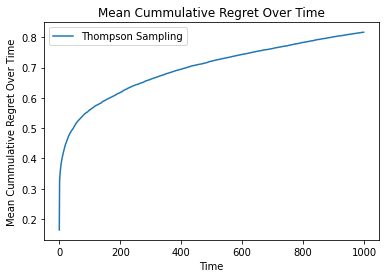

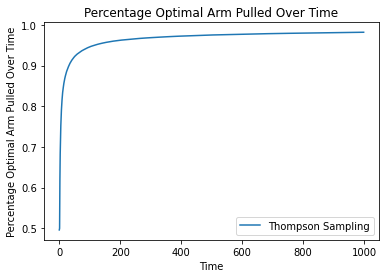

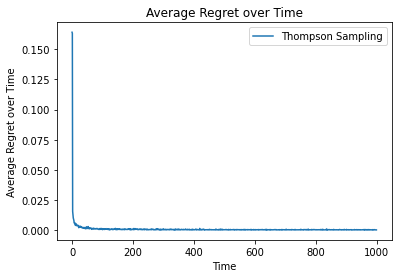

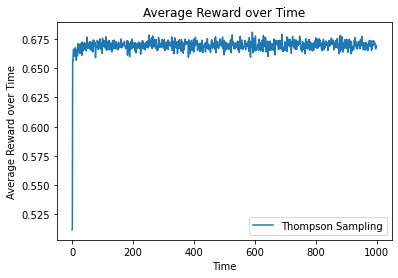

In [18]:
experiment.generate_plots()

In [19]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Thompson Sampling 0.8166627960675064


#### Reinforce Algorithm

In [20]:
algo = {"Reinforce": (Reinforce, {"lr": 0.1}),
        "Reinforce with Baseline": (Reinforce, {"use_baseline": True, "lr": 0.1})}

experiment = Experiment(
    algo, 
    "Normal_2_0.01_Reinforce", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()],
    reward_dist=Normal
)

In [21]:
experiment.simulate()

100%|██████████| 1000/1000 [08:23<00:00,  1.99it/s]


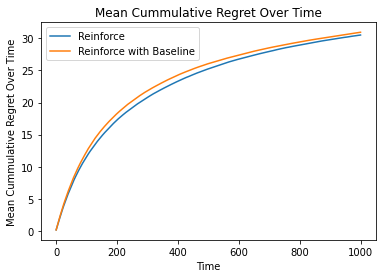

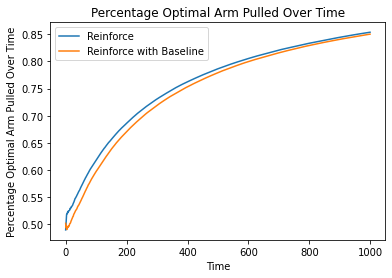

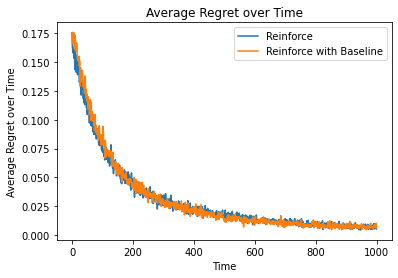

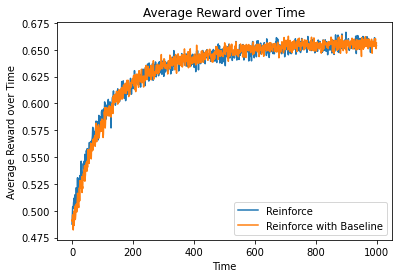

In [22]:
experiment.generate_plots()

In [23]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Reinforce 30.503951248622496
Reinforce with Baseline 30.937785511617037


#### Comparison of all Algorithms

In [24]:
algo = {
    "Greedy": (Greedy, {}),
    r"Softmax with $\tau=0.01$": (SoftmaxPolicy, {"temp": 0.01}),
    "Variable $C$-UCB": (UCB1_Normal, {"C_schedule": create_inverse_schedule(10)}),
    "Thompson Sampling": (ThompsonSampling, {"prior_dist": Distribution.Normal}),
    "Reinforce with Baseline": (Reinforce, {"use_baseline": True, "lr": 0.1})
}

experiment = Experiment(
    algo, 
    "Normal_2_0.01_All", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()],
    reward_dist=Normal
)

In [25]:
experiment.simulate()

100%|██████████| 1000/1000 [12:09<00:00,  1.37it/s]


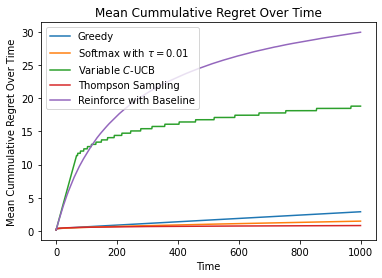

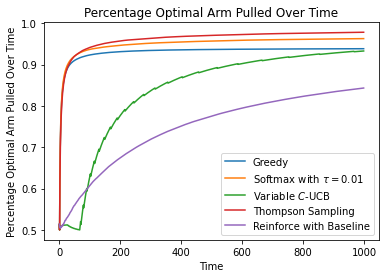

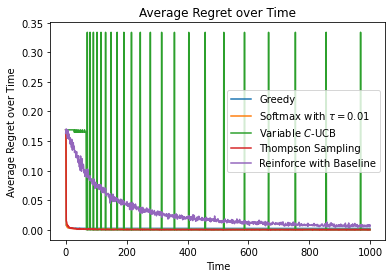

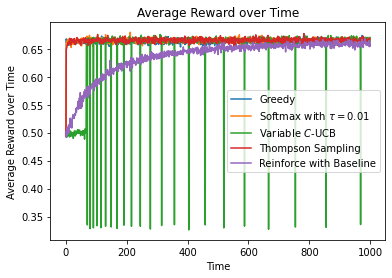

In [26]:
experiment.generate_plots()

In [27]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Greedy 2.896049562791022
Softmax with $\tau=0.01$ 1.4857721518115758
Variable $C$-UCB 18.79210078209883
Thompson Sampling 0.8192891882685003
Reinforce with Baseline 29.913882928595903


## Number of Arms K=5

#### Greedy Algorithm

In [2]:
algo = {"Greedy": (Greedy, {}),
       "$\epsilon=0.1$-Greedy": (Greedy, {"eps": 0.1}),
       "$\epsilon=0.01$-Greedy": (Greedy, {"eps": 0.01}),
       "Variable $\epsilon$-Greedy": (Greedy, {"eps_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Normal_5_0.01_Greedy", 
    num_runs=1000, 
    num_arms=5, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()], 
    reward_dist=Normal
)

In [3]:
experiment.simulate()

100%|██████████| 1000/1000 [09:13<00:00,  1.81it/s]


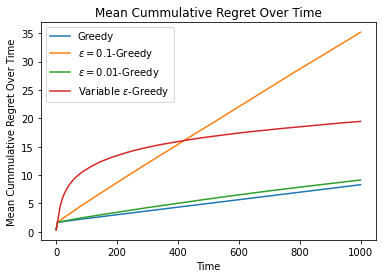

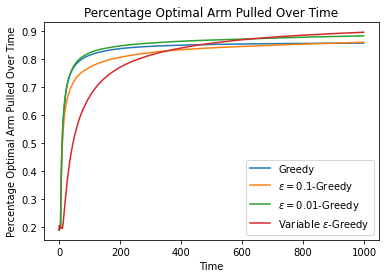

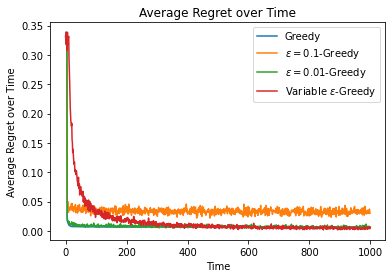

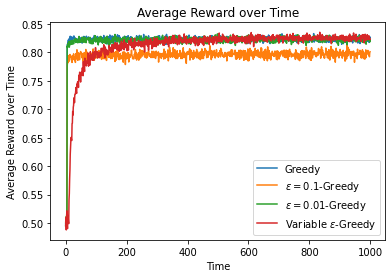

In [4]:
experiment.generate_plots()

In [5]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Greedy 8.29805561654893
$\epsilon=0.1$-Greedy 35.173931045384805
$\epsilon=0.01$-Greedy 9.130343488635573
Variable $\epsilon$-Greedy 19.462051235231378


#### Softmax Policy

In [6]:
algo = {r"Softmax with $\tau=0.01$": (SoftmaxPolicy, {"temp": 0.01}),
        r"Softmax with $\tau=10000$": (SoftmaxPolicy, {"temp": 10000}),
       r"Variable $\tau$-Softmax": (SoftmaxPolicy, {"temp_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Normal_5_0.01_Softmax", 
    num_runs=1000, 
    num_arms=5, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()],
    reward_dist=Normal
)

In [7]:
experiment.simulate()

100%|██████████| 1000/1000 [08:55<00:00,  1.87it/s]


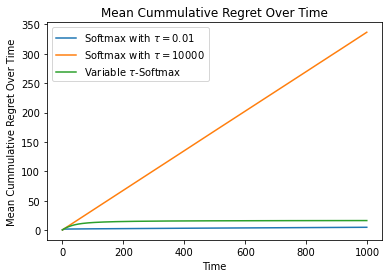

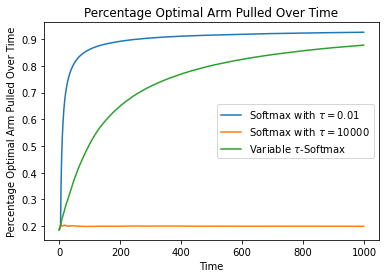

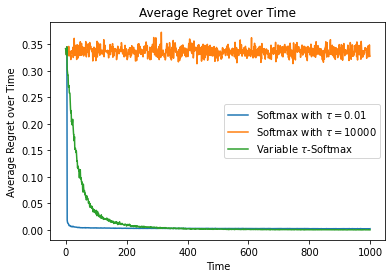

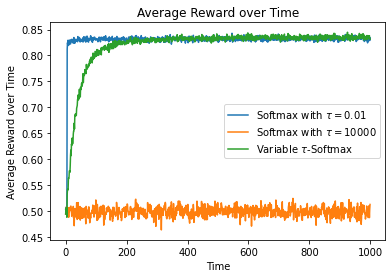

In [8]:
experiment.generate_plots()

In [9]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Softmax with $\tau=0.01$ 4.823225682934001
Softmax with $\tau=10000$ 336.5020241537124
Variable $\tau$-Softmax 16.249359021341952


#### UCB1-Normal Algorithm

In [10]:
algo = {"UCB with $C=1$": (UCB1_Normal, {"C": 1}),
        "UCB with $C=100$": (UCB1_Normal, {"C": 100}),
       "Variable $C$-UCB": (UCB1_Normal, {"C_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Normal_5_0.01_UCB", 
    num_runs=1000,
    num_arms=5,
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()], 
    reward_dist=Normal
)

In [11]:
experiment.simulate()

100%|██████████| 1000/1000 [06:24<00:00,  2.60it/s]


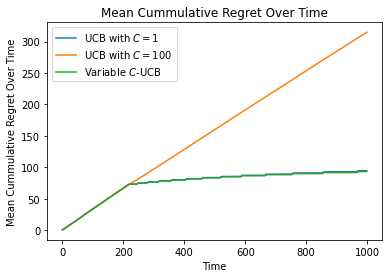

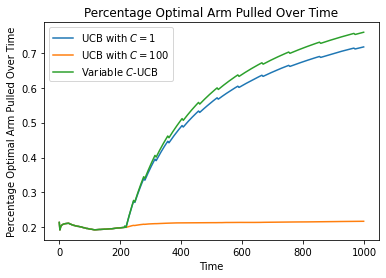

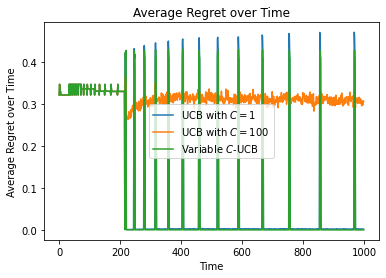

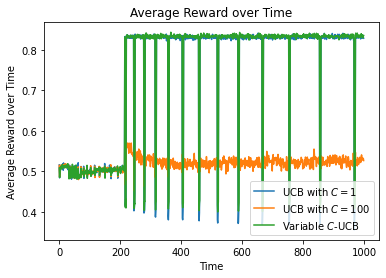

In [12]:
experiment.generate_plots()

In [13]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

UCB with $C=1$ 94.6407133516468
UCB with $C=100$ 314.93446827596654
Variable $C$-UCB 93.25965332101902


#### Thompson Sampling

In [14]:
algo = {"Thompson Sampling": (ThompsonSampling, {"prior_dist": Distribution.Normal})}

experiment = Experiment(
    algo, 
    "Normal_5_0.01_Thompson_Sampling", 
    num_runs=1000, 
    num_arms=5, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()], 
    reward_dist=Normal
)

In [15]:
experiment.simulate()

100%|██████████| 1000/1000 [02:04<00:00,  8.06it/s]


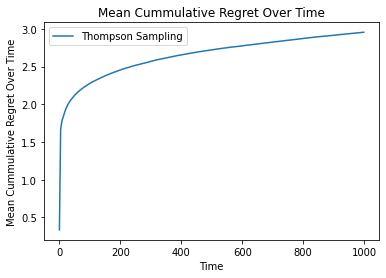

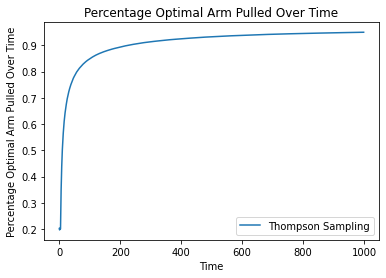

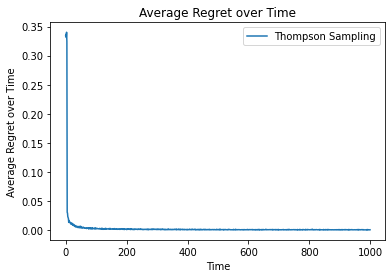

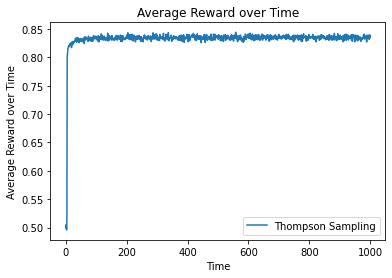

In [16]:
experiment.generate_plots()

In [17]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Thompson Sampling 2.9553911980370167


#### Reinforce Algorithm

In [18]:
algo = {"Reinforce": (Reinforce, {"lr": 0.1}),
        "Reinforce with Baseline": (Reinforce, {"use_baseline": True, "lr": 0.1})}

experiment = Experiment(
    algo, 
    "Normal_5_0.01_Reinforce", 
    num_runs=1000, 
    num_arms=5, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()],
    reward_dist=Normal
)

In [19]:
experiment.simulate()

100%|██████████| 1000/1000 [08:17<00:00,  2.01it/s]


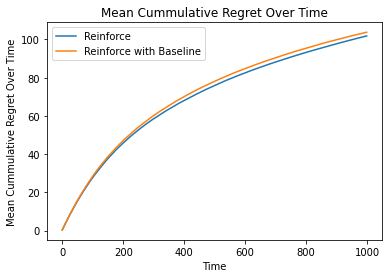

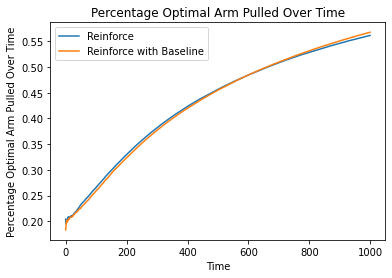

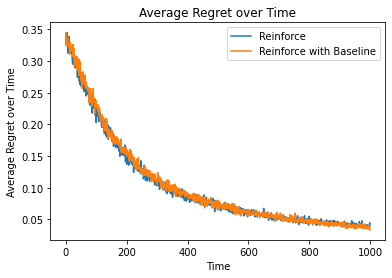

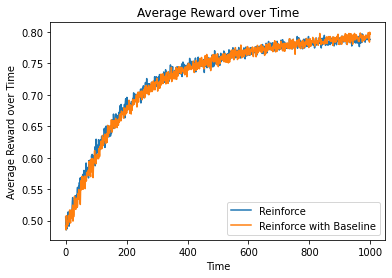

In [20]:
experiment.generate_plots()

In [21]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Reinforce 101.8521914430229
Reinforce with Baseline 103.77799925860548


#### Comparison of all Algorithms

In [22]:
algo = {
    "Greedy": (Greedy, {}),
    r"Softmax with $\tau=0.01$": (SoftmaxPolicy, {"temp": 0.01}),
    "Variable $C$-UCB": (UCB1_Normal, {"C_schedule": create_inverse_schedule(10)}),
    "Thompson Sampling": (ThompsonSampling, {"prior_dist": Distribution.Normal}),
    "Reinforce with Baseline": (Reinforce, {"use_baseline": True, "lr": 0.1})
}

experiment = Experiment(
    algo, 
    "Normal_5_0.01_All", 
    num_runs=1000, 
    num_arms=5, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()],
    reward_dist=Normal
)

In [23]:
experiment.simulate()

100%|██████████| 1000/1000 [06:41<00:00,  2.49it/s]


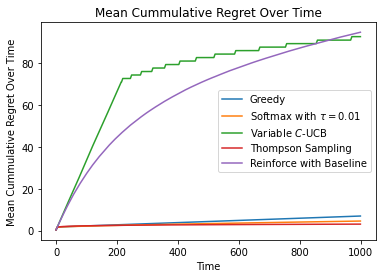

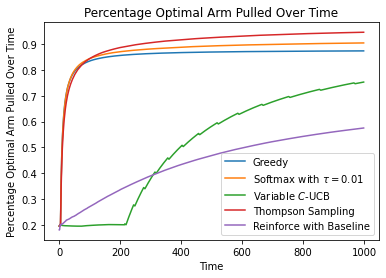

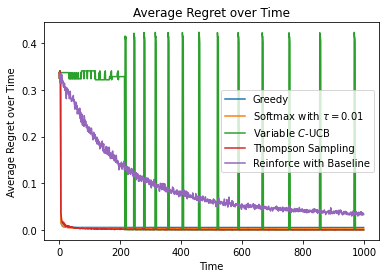

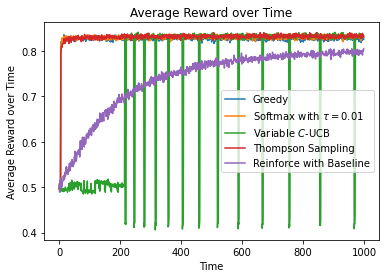

In [24]:
experiment.generate_plots()

In [25]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Greedy 6.972871868268563
Softmax with $\tau=0.01$ 4.573950291612641
Variable $C$-UCB 92.72381636088967
Thompson Sampling 3.102520169132682
Reinforce with Baseline 94.82507764037818


## Number of Arms K=10

#### Greedy Algorithm

In [26]:
algo = {"Greedy": (Greedy, {}),
       "$\epsilon=0.1$-Greedy": (Greedy, {"eps": 0.1}),
       "$\epsilon=0.01$-Greedy": (Greedy, {"eps": 0.01}),
       "Variable $\epsilon$-Greedy": (Greedy, {"eps_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Normal_10_0.01_Greedy", 
    num_runs=1000, 
    num_arms=10, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()], 
    reward_dist=Normal
)

In [27]:
experiment.simulate()

100%|██████████| 1000/1000 [02:33<00:00,  6.51it/s]


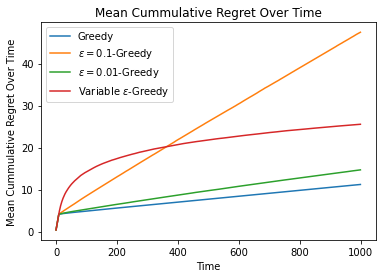

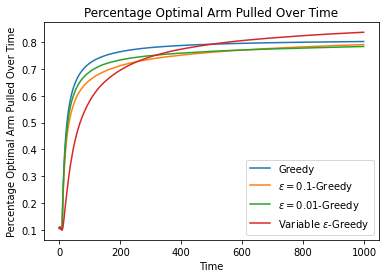

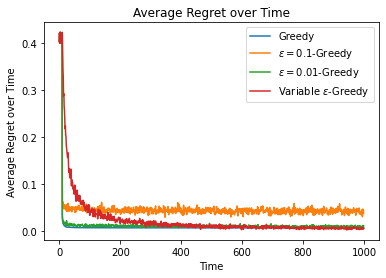

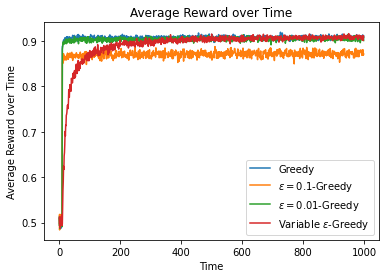

In [28]:
experiment.generate_plots()

In [29]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Greedy 11.22159451745437
$\epsilon=0.1$-Greedy 47.458109110494426
$\epsilon=0.01$-Greedy 14.696525753328375
Variable $\epsilon$-Greedy 25.551031731139172


#### Softmax Policy

In [30]:
algo = {r"Softmax with $\tau=0.01$": (SoftmaxPolicy, {"temp": 0.01}),
        r"Softmax with $\tau=10000$": (SoftmaxPolicy, {"temp": 10000}),
       r"Variable $\tau$-Softmax": (SoftmaxPolicy, {"temp_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Normal_10_0.01_Softmax", 
    num_runs=1000, 
    num_arms=10, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()],
    reward_dist=Normal
)

In [31]:
experiment.simulate()

100%|██████████| 1000/1000 [02:20<00:00,  7.14it/s]


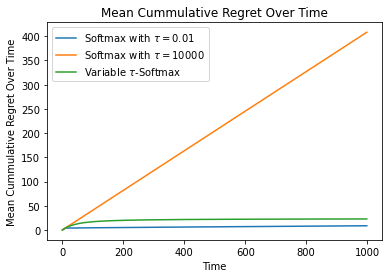

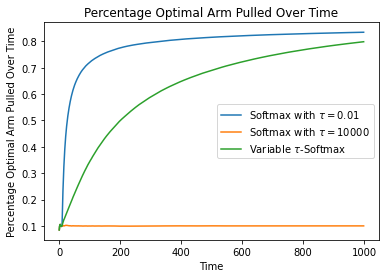

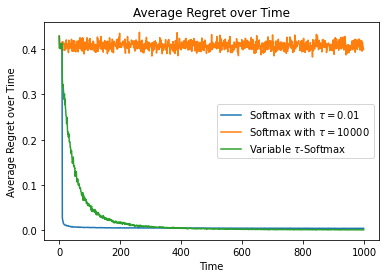

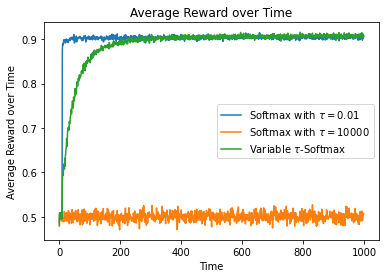

In [32]:
experiment.generate_plots()

In [33]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Softmax with $\tau=0.01$ 8.979590246210764
Softmax with $\tau=10000$ 408.1735118237641
Variable $\tau$-Softmax 23.041294486100078


#### UCB1-Normal Algorithm

In [34]:
algo = {"UCB with $C=1$": (UCB1_Normal, {"C": 1}),
        "UCB with $C=100$": (UCB1_Normal, {"C": 100}),
       "Variable $C$-UCB": (UCB1_Normal, {"C_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Normal_10_0.01_UCB", 
    num_runs=1000,
    num_arms=10,
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()], 
    reward_dist=Normal
)

In [35]:
experiment.simulate()

100%|██████████| 1000/1000 [01:43<00:00,  9.62it/s]


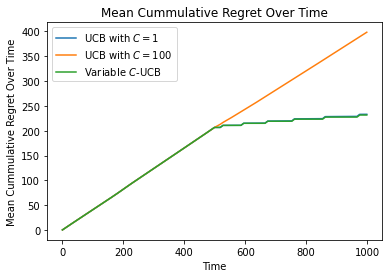

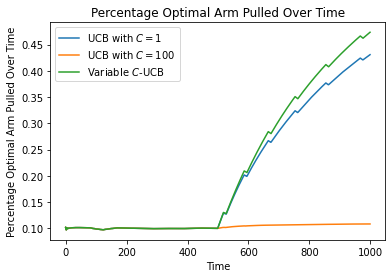

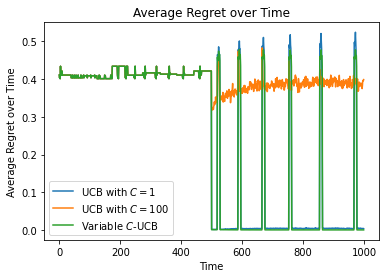

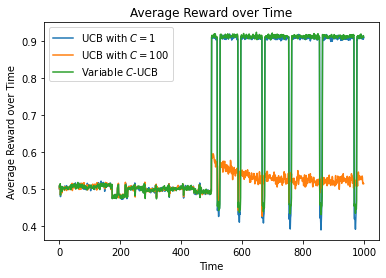

In [36]:
experiment.generate_plots()

In [37]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

UCB with $C=1$ 232.91725723982123
UCB with $C=100$ 397.93199311530174
Variable $C$-UCB 231.46748170920836


#### Thompson Sampling

In [38]:
algo = {"Thompson Sampling": (ThompsonSampling, {"prior_dist": Distribution.Normal})}

experiment = Experiment(
    algo, 
    "Normal_10_0.01_Thompson_Sampling", 
    num_runs=1000, 
    num_arms=10, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()], 
    reward_dist=Normal
)

In [39]:
experiment.simulate()

100%|██████████| 1000/1000 [00:44<00:00, 22.37it/s]


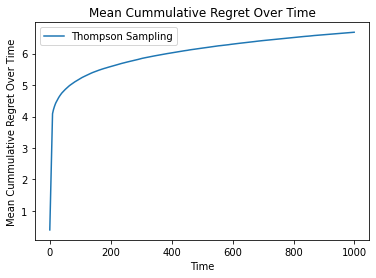

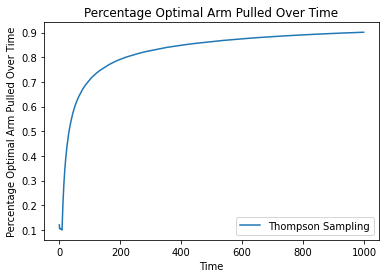

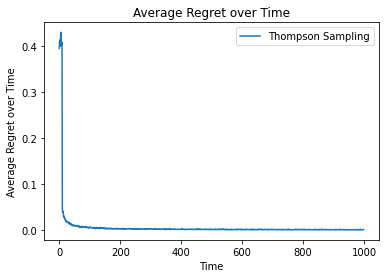

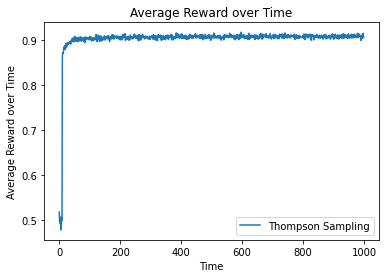

In [40]:
experiment.generate_plots()

In [41]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Thompson Sampling 6.679748625286543


#### Reinforce Algorithm

In [42]:
algo = {"Reinforce": (Reinforce, {"lr": 0.1}),
        "Reinforce with Baseline": (Reinforce, {"use_baseline": True, "lr": 0.1})}

experiment = Experiment(
    algo, 
    "Normal_10_0.01_Reinforce", 
    num_runs=1000, 
    num_arms=10, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()],
    reward_dist=Normal
)

In [43]:
experiment.simulate()

100%|██████████| 1000/1000 [02:04<00:00,  8.01it/s]


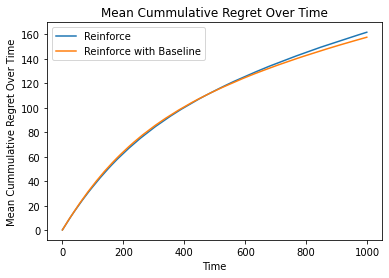

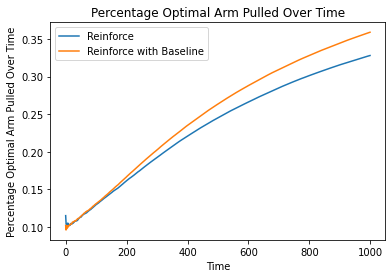

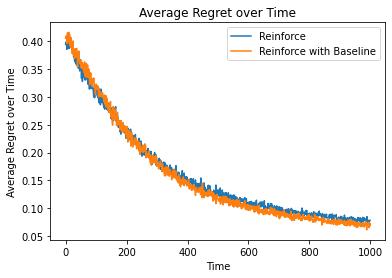

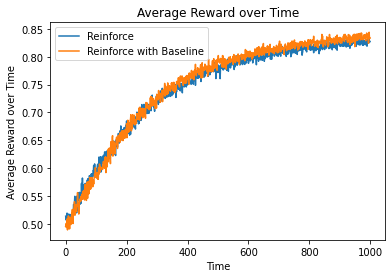

In [44]:
experiment.generate_plots()

In [45]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Reinforce 161.8245874975664
Reinforce with Baseline 157.74051701906103


#### Comparison of all Algorithms

In [46]:
algo = {
    "Greedy": (Greedy, {}),
    r"Softmax with $\tau=0.01$": (SoftmaxPolicy, {"temp": 0.01}),
    "Variable $C$-UCB": (UCB1_Normal, {"C_schedule": create_inverse_schedule(10)}),
    "Thompson Sampling": (ThompsonSampling, {"prior_dist": Distribution.Normal}),
    "Reinforce with Baseline": (Reinforce, {"use_baseline": True, "lr": 0.1})
}

experiment = Experiment(
    algo, 
    "Normal_10_0.01_All", 
    num_runs=1000, 
    num_arms=10, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()],
    reward_dist=Normal
)

In [47]:
experiment.simulate()

100%|██████████| 1000/1000 [03:50<00:00,  4.35it/s]


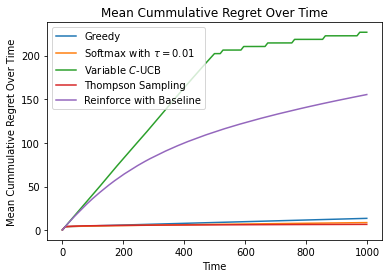

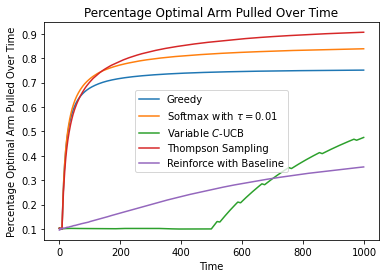

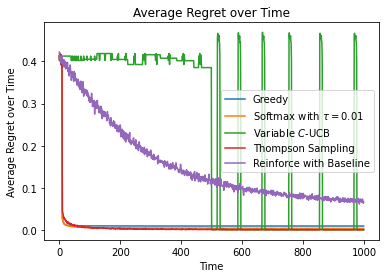

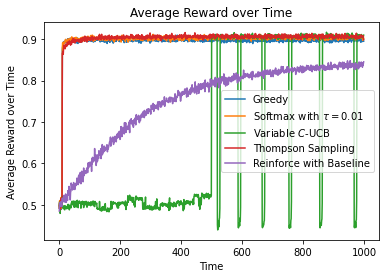

In [48]:
experiment.generate_plots()

In [49]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Greedy 13.650124779585607
Softmax with $\tau=0.01$ 8.804351278217757
Variable $C$-UCB 226.73071729703014
Thompson Sampling 6.747965819997031
Reinforce with Baseline 155.3976398276857


# An Interesting Case for Reinforce Algorithm

In [2]:
algo = {"Reinforce": (Reinforce, {"lr": 0.1}),
        "Reinforce with Baseline": (Reinforce, {"use_baseline": True, "lr": 0.1})}

experiment = Experiment(
    algo, 
    "Interesting_Reinforce", 
    num_runs=1000, 
    num_arms=10, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()],
    reward_dist=Normal
)

In [3]:
experiment.simulate()

100%|██████████| 1000/1000 [08:02<00:00,  2.07it/s]


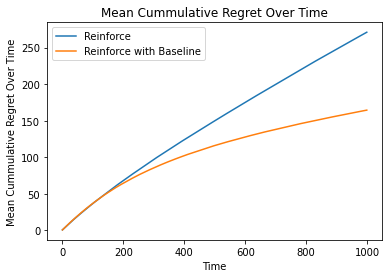

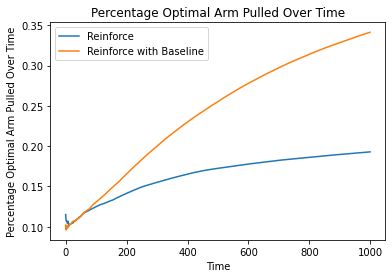

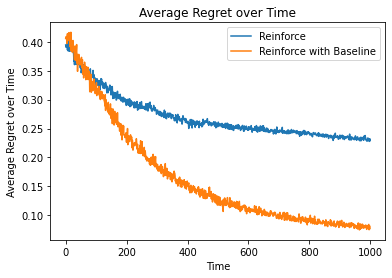

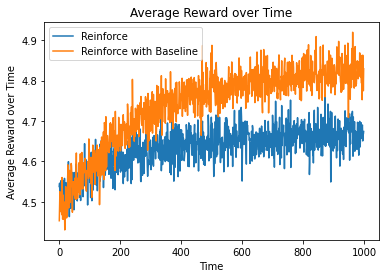

In [4]:
experiment.generate_plots()

In [5]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Reinforce 271.07235397492474
Reinforce with Baseline 164.42099041260653
